In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Multivariate_Linear_Regression.csv")

In [3]:
df

,X1,X2,X3,X4,y
0,20.631730,12.867703,8.395460,13.990905,189.031908
1,4.101116,5.433219,3.563688,7.586737,65.410833
2,11.924915,-4.457952,4.307833,-3.869729,34.669369
3,33.079571,13.541840,0.573275,5.720989,189.053144
4,23.595950,14.390700,2.435688,28.890003,215.060877
...,...,...,...,...,...
4995,34.957819,12.133620,-4.530844,1.458013,177.207858
4996,41.573404,18.242280,4.724725,6.538582,295.463522
4997,15.128376,7.109396,5.293913,-3.501484,126.802408
4998,-4.791663,29.005545,-4.566243,18.247600,90.613662


In [4]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
y     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      5000 non-null   float64
 1   X2      5000 non-null   float64
 2   X3      5000 non-null   float64
 3   X4      5000 non-null   float64
 4   y       5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [6]:
df.shape

(5000, 5)

<Axes: >

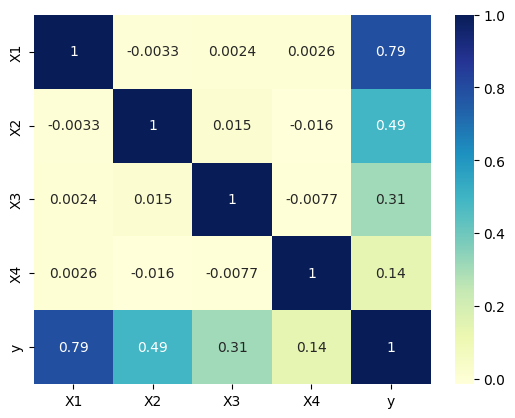

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

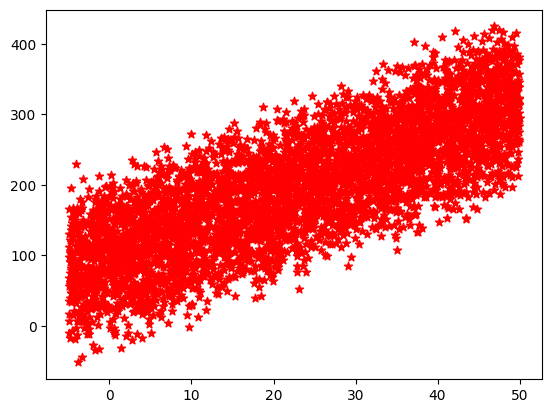

In [11]:
plt.scatter(df.X1 , df.y , marker = "*" , c = "red")

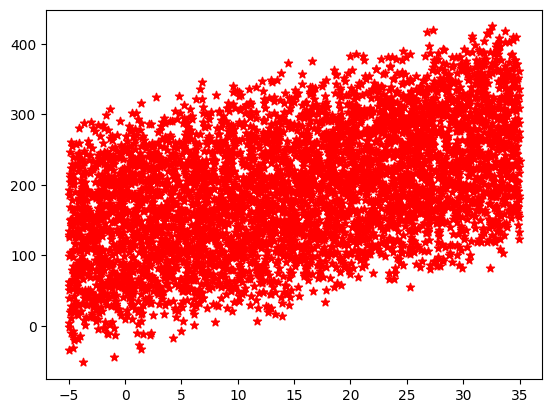

In [12]:
plt.scatter(df.X2 , df.y , marker = "*" , c = "red")

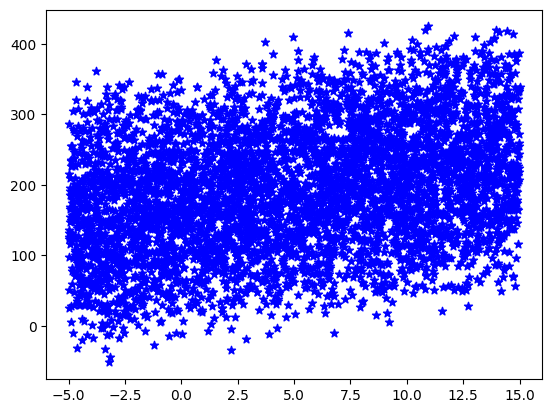

In [13]:
plt.scatter(df.X3 , df.y , marker = "*" , c = "blue")

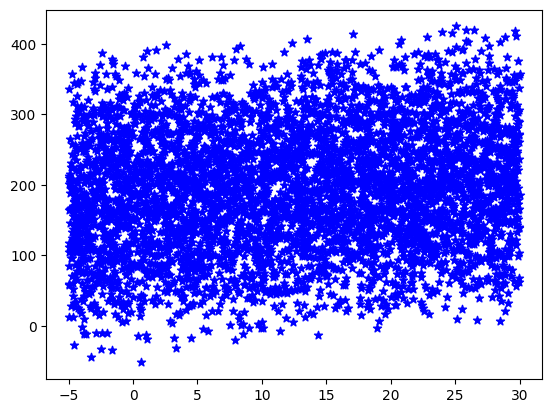

In [14]:
plt.scatter(df.X4 , df.y , marker = "*" , c = "blue")

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X = df.drop(columns = "y")

In [18]:
X

,X1,X2,X3,X4
0,20.631730,12.867703,8.395460,13.990905
1,4.101116,5.433219,3.563688,7.586737
2,11.924915,-4.457952,4.307833,-3.869729
3,33.079571,13.541840,0.573275,5.720989
4,23.595950,14.390700,2.435688,28.890003
...,...,...,...,...
4995,34.957819,12.133620,-4.530844,1.458013
4996,41.573404,18.242280,4.724725,6.538582
4997,15.128376,7.109396,5.293913,-3.501484
4998,-4.791663,29.005545,-4.566243,18.247600


In [19]:
Y = df.y

In [21]:
Y

0       189.031908
1        65.410833
2        34.669369
3       189.053144
4       215.060877
           ...    
4995    177.207858
4996    295.463522
4997    126.802408
4998     90.613662
4999    103.556223
Name: y, Length: 5000, dtype: float64

In [23]:
X = sc.fit_transform(X)

In [27]:
Y = sc.fit_transform(Y.values.reshape(-1 ,1))

In [28]:
X

array([[-0.12846048, -0.19103711,  0.59879757,  0.13433456],
       [-1.17366726, -0.83205657, -0.2450705 , -0.49535007],
       [-0.67897981, -1.68489751, -0.11510556, -1.62179766],
       ...,
       [-0.47642956, -0.68753246,  0.05711308, -1.58559031],
       [-1.73594478,  1.20040715, -1.66496116,  0.55287057],
       [-1.42102527,  0.53742428,  0.21084204, -0.69809416]])

In [29]:
Y

array([[-0.06404565],
       [-1.48941635],
       [-1.84387034],
       ...,
       [-0.78156171],
       [-1.19882372],
       [-1.04959393]])

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [36]:
X_train.shape

(4000, 4)

In [38]:
X_test.shape

(1000, 4)

In [61]:
Y_train.shape

(4000, 1)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [41]:
model.fit(X_train , Y_train)

LinearRegression()

In [74]:
model_p = model.predict(X_train)

In [75]:
score = model.score(X , Y)

In [76]:
score

0.9821087502533565

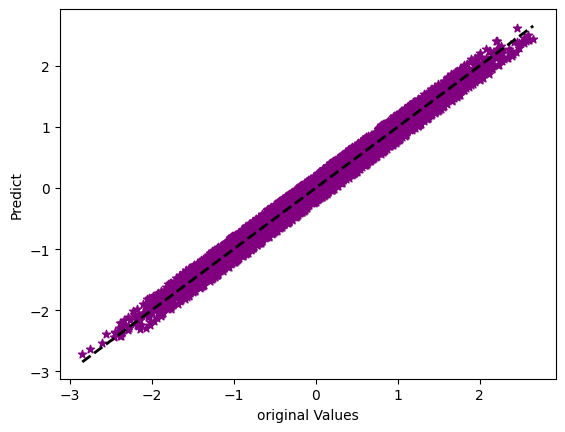

In [77]:
plt.scatter(Y_train,model_p, marker = '*' , c = 'purple')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)],linestyle='--', color='black', linewidth=2)
plt.xlabel("original Values")
plt.ylabel("Predict")
plt.show()